In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('tv_shows.csv')

# Get all the overall ratings for each season
season_ratings = data.groupby('Season')['Rating'].mean()

# Plot the ratings for all the seasons
plt.plot(season_ratings.index, season_ratings.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Ratings for Each Season')
plt.show()

# Get all the episode names whose average rating is more than 8 for every season
highly_rated_episodes = data.groupby(['Season', 'Episode'])['Rating'].mean().reset_index()
highly_rated_episodes = highly_rated_episodes[highly_rated_episodes['Rating'] > 8]
highly_rated_episodes_names = highly_rated_episodes['Episode'].unique()

# Get all the episode names that aired before May 2019
data['Air Date'] = pd.to_datetime(data['Air Date'])
episodes_before_may_2019 = data[data['Air Date'] < '2019-05-01']['Episode'].unique()

# Get the episode name from each season with the highest and lowest rating
highest_rating_episodes = data.groupby('Season')['Rating'].idxmax()
lowest_rating_episodes = data.groupby('Season')['Rating'].idxmin()
highest_rating_episodes_names = data.loc[highest_rating_episodes, 'Episode']
lowest_rating_episodes_names = data.loc[lowest_rating_episodes, 'Episode']

# Get the summary for the most popular episode in every season
most_popular_episodes = data.groupby('Season')['Rating'].idxmax()
most_popular_episodes_summary = data.loc[most_popular_episodes, ['Season', 'Episode', 'Summary']]

# Print the results
print("Episode names with average rating > 8 for every season:")
print(highly_rated_episodes_names)
print()

print("Episode names that aired before May 2019:")
print(episodes_before_may_2019)
print()

print("Episode name with the highest rating for each season:")
print(highest_rating_episodes_names)
print()

print("Episode name with the lowest rating for each season:")
print(lowest_rating_episodes_names)
print()

print("Summary for the most popular episode in every season:")
print(most_popular_episodes_summary)


In [3]:
import requests
import pandas as pd
import html2text

# Send a GET request to retrieve the show data
response = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
show_data = response.json()

# Extract and process episode data
episodes = show_data['_embedded']['episodes']

# Initialize empty lists to store the extracted data
episode_data = []

# Extract episode data and append to the lists
for episode in episodes:
    episode_id = episode['id']
    episode_url = episode['url']
    episode_name = episode['name']
    season_number = episode['season']
    episode_number = episode['number']
    episode_type = episode['type']
    airdate = episode['airdate']
    airtime = episode['airtime']
    runtime = episode['runtime']
    average_rating = episode['rating']['average']
    summary = html2text.html2text(episode['summary'].replace('<p>', '').replace('</p>', ''))
    medium_image_link = episode['image']['medium']
    original_image_link = episode['image']['original']
    
    # Append the extracted data to the episode_data list
    episode_data.append([episode_id, episode_url, episode_name, season_number, episode_number, episode_type,
                         airdate, airtime, runtime, average_rating, summary, medium_image_link, original_image_link])

# Create a pandas DataFrame from the extracted data
columns = ['Episode ID', 'URL', 'Name', 'Season', 'Number', 'Type', 'Airdate', 'Airtime', 'Runtime', 'Average Rating',
           'Summary', 'Medium Image Link', 'Original Image Link']
df = pd.DataFrame(episode_data, columns=columns)

# Print the DataFrame
print(df)


    Episode ID                                                URL  \
0       869671  https://www.tvmaze.com/episodes/869671/westwor...   
1       911201  https://www.tvmaze.com/episodes/911201/westwor...   
2       911204  https://www.tvmaze.com/episodes/911204/westwor...   
3       911205  https://www.tvmaze.com/episodes/911205/westwor...   
4       927174  https://www.tvmaze.com/episodes/927174/westwor...   
5       932057  https://www.tvmaze.com/episodes/932057/westwor...   
6       938404  https://www.tvmaze.com/episodes/938404/westwor...   
7       943065  https://www.tvmaze.com/episodes/943065/westwor...   
8       943066  https://www.tvmaze.com/episodes/943066/westwor...   
9       943067  https://www.tvmaze.com/episodes/943067/westwor...   
10     1214222  https://www.tvmaze.com/episodes/1214222/westwo...   
11     1440915  https://www.tvmaze.com/episodes/1440915/westwo...   
12     1440916  https://www.tvmaze.com/episodes/1440916/westwo...   
13     1440917  https://www.tvmaze

In [4]:
df

,Episode ID,URL,Name,Season,Number,Type,Airdate,Airtime,Runtime,Average Rating,Summary,Medium Image Link,Original Image Link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [6]:
df.dtypes


Episode ID               int64
URL                     object
Name                    object
Season                   int64
Number                   int64
Type                    object
Airdate                 object
Airtime                 object
Runtime                  int64
Average Rating         float64
Summary                 object
Medium Image Link       object
Original Image Link     object
dtype: object

In [7]:
df.describe()


,Episode ID,Season,Number,Runtime,Average Rating
count,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,1.570518e+06,2.388889,5.055556,62.888889,7.872222
std,5.198296e+05,1.128280,2.714453,8.386308,0.373869
min,8.696710e+05,1.000000,1.000000,51.000000,7.100000
25%,9.430668e+05,1.000000,3.000000,60.000000,7.675000
50%,1.459790e+06,2.000000,5.000000,60.000000,7.800000
75%,1.807458e+06,3.000000,7.000000,60.000000,8.000000
max,2.326661e+06,4.000000,10.000000,90.000000,8.700000


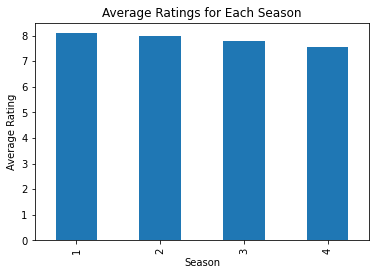

In [9]:
import matplotlib.pyplot as plt

# 1. Compare ratings for all seasons
season_ratings = df.groupby('Season')['Average Rating'].mean()
season_ratings.plot(kind='bar', xlabel='Season', ylabel='Average Rating', title='Average Ratings for Each Season')
plt.show()



In [10]:
# 2. Episodes with average rating > 8 for each season
high_rated_episodes = df[df['Average Rating'] > 8]
high_rated_episodes_by_season = high_rated_episodes.groupby('Season')['Name'].apply(list)
print('Episodes with average rating > 8 for each season:')
print(high_rated_episodes_by_season)



Episodes with average rating > 8 for each season:
Season
1    [Trompe L'Oeil, The Well-Tempered Clavier, The...
2            [Kiksuya, Vanishing Point, The Passenger]
Name: Name, dtype: object


In [11]:
# 3. Episodes aired before May 2019
df['Airdate'] = pd.to_datetime(df['Airdate'])
episodes_before_2019 = df[df['Airdate'] < '2019-05-01']
print('Episodes aired before May 2019:')
print(episodes_before_2019['Name'])



Episodes aired before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: Name, dtype: object


In [12]:
# 4. Episode with highest and lowest rating in each season
highest_rated_episodes = df.groupby('Season').apply(lambda x: x.loc[x['Average Rating'].idxmax()]['Name'])
lowest_rated_episodes = df.groupby('Season').apply(lambda x: x.loc[x['Average Rating'].idxmin()]['Name'])
print('Episode with highest rating in each season:')
print(highest_rated_episodes)
print('Episode with lowest rating in each season:')
print(lowest_rated_episodes)


Episode with highest rating in each season:
Season
1    The Bicameral Mind
2               Kiksuya
3          Parce Domine
4              Zhuangzi
dtype: object
Episode with lowest rating in each season:
Season
1       The Stray
2    Akane No Mai
3     Decoherence
4    The Auguries
dtype: object


In [13]:

# 5. Summary for the most popular episode in each season
most_popular_episodes = df.groupby('Season').apply(lambda x: x.loc[x['Average Rating'].idxmax()]['Summary'])
print('Summary for the most popular episode in each season:')
print(most_popular_episodes)


Summary for the most popular episode in each season:
Season
1    Delores finds out the truth about William's fa...
2    Another of Westworld's Host revolutionaries is...
3    If you're stuck in a loop, try walking in a st...
4                                    God is bored.\n\n
dtype: object
